In [1]:
#%pip install jupyterlab-mathjax3

In [2]:
#!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/master/init.py
#import init; init.init(force_download=False); 
from IPython.display import Image

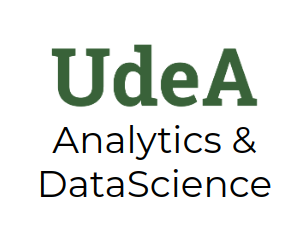

In [3]:
Image("../../docs/udea-datascience.png")

**Desarrollado por:** Javier Fernando Botía Valderrama

*Docente del Departamento de Ingeniería de Sistemas*

**Materia:** Estadística y Análisis Exploratorio

**Departamento:** Posgrado en Ingeniería

**Facultad de Ingeniería - Universidad de Antioquia**

# Análisis de Datos Cuantitativos

In [4]:
import pandas as pd
import io
import requests
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import MinMaxScaler

from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.special import entr # Entropía de Shannon
from scipy.stats import uniform # función de densidad de probabilidad uniforme
from scipy import special # Funciones especiales
from scipy.stats import kstest # test KS
import scipy.stats

## Relación entre Variables o Características de una Base de Datos

En la prueba de hipótesis que se utiliza en la estadísticas descriptiva, existen 3 herramientas para realizar varios tipos de análisis de acuerdo a la interacción o dependencia entre variables o características de los datos:

1.   **Relación entre variables nominales o categóricos:** Analiza la interrelación entre los valores de variables nominales, mediante una *tabla de contingencia*. Ese tipo de tabla se calcula mediante las frecuencia de aparición de distintas combinaciones de valores de dos variables. Por lo general, este tipo análisis se realiza mediante el **test chi-cuadrada**, que veremos más adelante.
2.   **Relación entre variables numéricas-nominales:** Analiza las posibles relaciones entre dos variables, una de ellas numérica y la otra nominal, comparando medias y proporciones de los datos. En este método, la hipótesis nula se rechaza si las diferencias entre medias condicionadas a las etiquetas de la variable nominal son debidas a un proceso aleatorio. Por lo general, el **test t** y **ANOVA** son pruebas muy usuadas para este tipo de relaciones.
3.   **Relación entre variables numéricas:** Analiza las posibles relaciones de dos variables numéricas mediante un análisis de regresión o por covarianzas o por correlaciones. Las matrices de **correlación** y de **covarianza** son muy útiles para este tipo de análisis.

## Método 1: Matriz de Covarianza

La **matriz de covarianza** es un arreglo de grados de relación lineal existente entre los valores de dos variables numéricas tal que $cov(x_n,x_m)$ es la covarianza entre un dato $x_n$ y otro dato $x_m$, tal que $n \neq m$. Si $n = m$, entonces se determina la varianza $var(x_n)$, que representará como la diagonal principal de la matriz.

$$\Sigma_x = \frac{1}{N} \sum_{n=1}^N (x_n - \mu_c)(x_n - \mu_c)^T$$

donde $N$ es el número de muestras y $\mu_c$ es la media de cada variable:

$$\mu_c = \frac{1}{N} \sum_{n=1}^N x_{n,c}$$

siendo $c = \lbrace 1, \ldots, K \rbrace$, donde $K$ es el número de variables. El arregolo matricial de $\Sigma_x$ tiene la siguiente representación:

$$\Sigma_x = \begin{bmatrix} var(x_1) & cov(x_1,x_2) & \ldots & cov(x_1,x_K)\\
cov(x_2,x_1) & var(x_2) & \ldots & cov(x_2,x_K)\\
\vdots & \vdots & \ddots & \cdots\\
cov(x_K,x_1) & cov(x_k,x_2) & \ldots & var(x_K) \end{bmatrix}$$

La covarianza se maximiza si dos vectores de datos son idénticos y si la covarianza es $0$ entonces ambos vectores son ortogonales. Si la covarianza tiene valores negativos significa que ambos vectores tienen direcciones opuestas.

In [5]:
url = "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/concrete.dat"
download = requests.get(url).content
datos_concreto = pd.read_table(io.StringIO(download.decode('utf-8')), sep=',', decimal = ',') 
# Es importante codificarlo a utf-8
display(datos_concreto.head(10))

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteCompressiveStrength
0,252.000000,0.000000,0.000000,185.000000,0.000000,1111.000000,784.000000,7.000000,13.710000
1,295.799988,0.000000,0.000000,185.699997,0.000000,1091.400024,769.299988,7.000000,14.840000
2,252.300003,0.000000,98.800003,146.300003,14.200000,987.799988,889.000000,3.000000,21.780001
3,172.399994,13.600000,172.399994,156.800003,4.100000,1006.299988,856.400024,28.000000,33.689999
4,162.000000,214.000000,164.000000,202.000000,10.000000,820.000000,680.000000,28.000000,30.650000
5,446.000000,24.000000,79.000000,162.000000,11.600000,967.000000,712.000000,56.000000,55.250000
6,540.000000,0.000000,0.000000,173.000000,0.000000,1125.000000,613.000000,14.000000,59.759998
7,154.800003,0.000000,142.800003,193.300003,9.100000,1047.400024,696.700012,28.000000,12.460000
8,167.399994,129.899994,128.600006,175.500000,7.800000,1006.299988,746.599976,56.000000,51.720001
9,277.000000,0.000000,0.000000,191.000000,0.000000,968.000000,856.000000,14.000000,21.260000


In [6]:
datos_concreto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Cement                        1030 non-null   object
 1    BlastFurnaceSlag             1030 non-null   object
 2    FlyAsh                       1030 non-null   object
 3    Water                        1030 non-null   object
 4    Superplasticizer             1030 non-null   object
 5    CoarseAggregate              1030 non-null   object
 6    FineAggregate                1030 non-null   object
 7    Age                          1030 non-null   object
 8    ConcreteCompressiveStrength  1030 non-null   object
dtypes: object(9)
memory usage: 72.5+ KB


In [7]:
datos_concreto = datos_concreto.astype(float)
datos_concreto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cement                        1030 non-null   float64
 1    BlastFurnaceSlag             1030 non-null   float64
 2    FlyAsh                       1030 non-null   float64
 3    Water                        1030 non-null   float64
 4    Superplasticizer             1030 non-null   float64
 5    CoarseAggregate              1030 non-null   float64
 6    FineAggregate                1030 non-null   float64
 7    Age                          1030 non-null   float64
 8    ConcreteCompressiveStrength  1030 non-null   float64
dtypes: float64(9)
memory usage: 72.5 KB


Vamos a considerar las características *Cement*, *BlastFurnaceSlag*, *FlyAsh*, *Water*, *Superplasticizer*, *CoarseAggregate*, *FineAggregate* y *Age*, para generar la matriz de covarianza.

In [8]:
Features = datos_concreto[['Cement',' BlastFurnaceSlag', ' FlyAsh', ' Water', ' Superplasticizer', 
                           ' CoarseAggregate', ' FineAggregate', ' Age']]

A partir de la selección de las columnas o características de la base de datos, generamos la matriz de covarianza

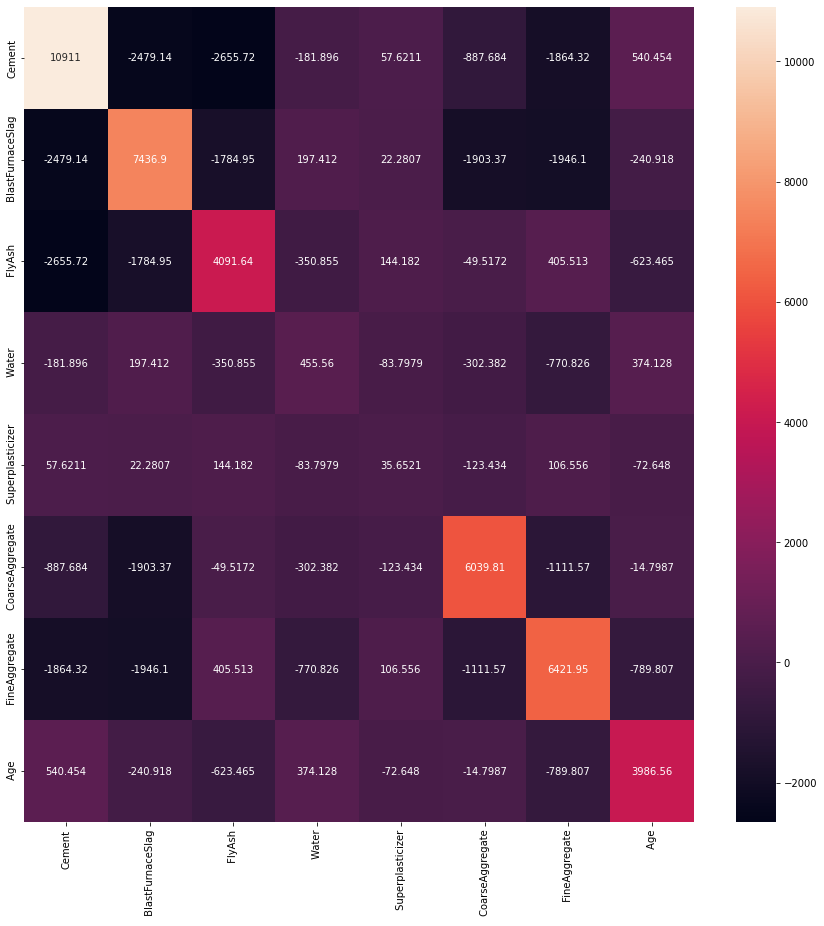

In [9]:
Matrix_Covarianza = np.cov(Features.transpose(), bias=True) # bias = True normaliza los datos (les recomienda esa opción)
Caracteristicas = Features.columns

plt.figure(figsize=(15,15))
ax = sns.heatmap(Matrix_Covarianza, annot=True, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas)
plt.show()

## Método 2: Matriz de Correlación

La **matriz de correlación** es la matriz de covarianza normalizada con las varianzas de cada variable o atributo. Definimos la varianza para la correlación, $\sigma_{x_i}^2$, como:

$$\sigma_{x_c}^2 = \frac{1}{N-1}\sum_{n=1}^N (x_{n,c} - \mu_c)^2 $$

Por consiguiente, la matriz de correlación tendrá el siguiente arreglo:

$$Cor_x = \begin{bmatrix} \frac{var(x_1)}{\sigma_{x_1}^2} & \frac{cov(x_1,x_2)}{\sigma_{x_1}^2\sigma_{x_2}^2} & \ldots & \frac{cov(x_1,x_K)}{\sigma_{x_1}^2\sigma_{x_K}^2}\\
\frac{cov(x_2,x_1)}{\sigma_{x_2}^2\sigma_{x_1}^2} & \frac{var(x_2)}{\sigma_{x_2}^2} & \ldots & \frac{cov(x_2,x_K)}{\sigma_{x_2}^2\sigma_{x_K}^2}\\
\vdots & \vdots & \ddots & \cdots\\
\frac{cov(x_K,x_1)}{\sigma_{x_K}^2\sigma_{x_1}^2} & \frac{cov(x_k,x_2)}{\sigma_{x_K}^2\sigma_{x_1}^2} & \ldots & \frac{var(x_K)}{\sigma_{x_K}^2} \end{bmatrix}$$

Por lo general, la diagonal principal es un vector de $1$. Si la correlación es cercano a $0$, significa que ambas variables son independientes y diferentes entre sí. Otra forma de interpretar la correlación es la siguiente:

*   *Correlación Positiva:* Si dos caracterísiticas o variables se mueven en una misma dirección, es decir que si una característica crece sus valores entonces la otra característica también crece. Lo anterior también se aplica si al decrecer los valores de una característica, la otra característica también decrece.
*   *Correlación Negativa:* Las dos características se mueven en dirección opuesta, es decir, si los valores de una característica decrece entonces los valores de la otra característica aumenta y viceversa.
*   *Correlación Neutral:* Las dos características no muestran relación entre sí y por consiguiente, son independientes. 

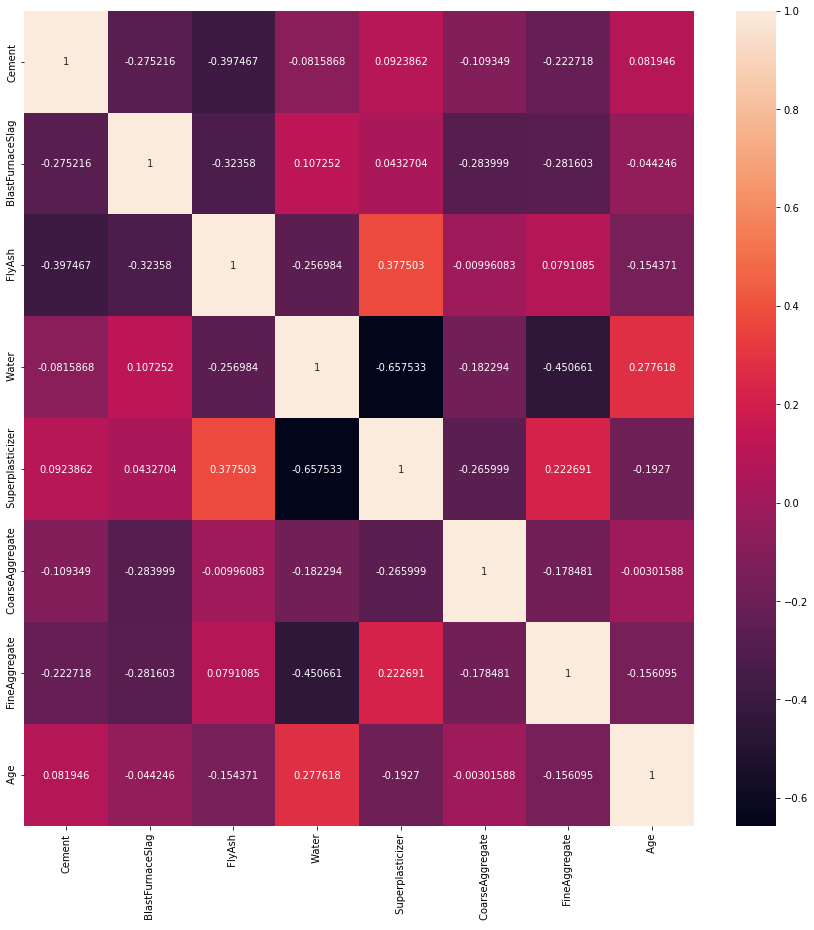

In [10]:
Matriz_Correlacion = Features.corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(Matriz_Correlacion, annot=True, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas)
plt.show()

Analizando la matriz de correlación, ninguna característica o variable tienen una correlación mayor a 0.7 (obviando la diagonal principal de la matriz). Usualmente, se utiliza este umbral para definir si dos características son similares entre sí. Si se llegará a encontrar un valor de correlación de 0.7, se podría descartar una de las características.

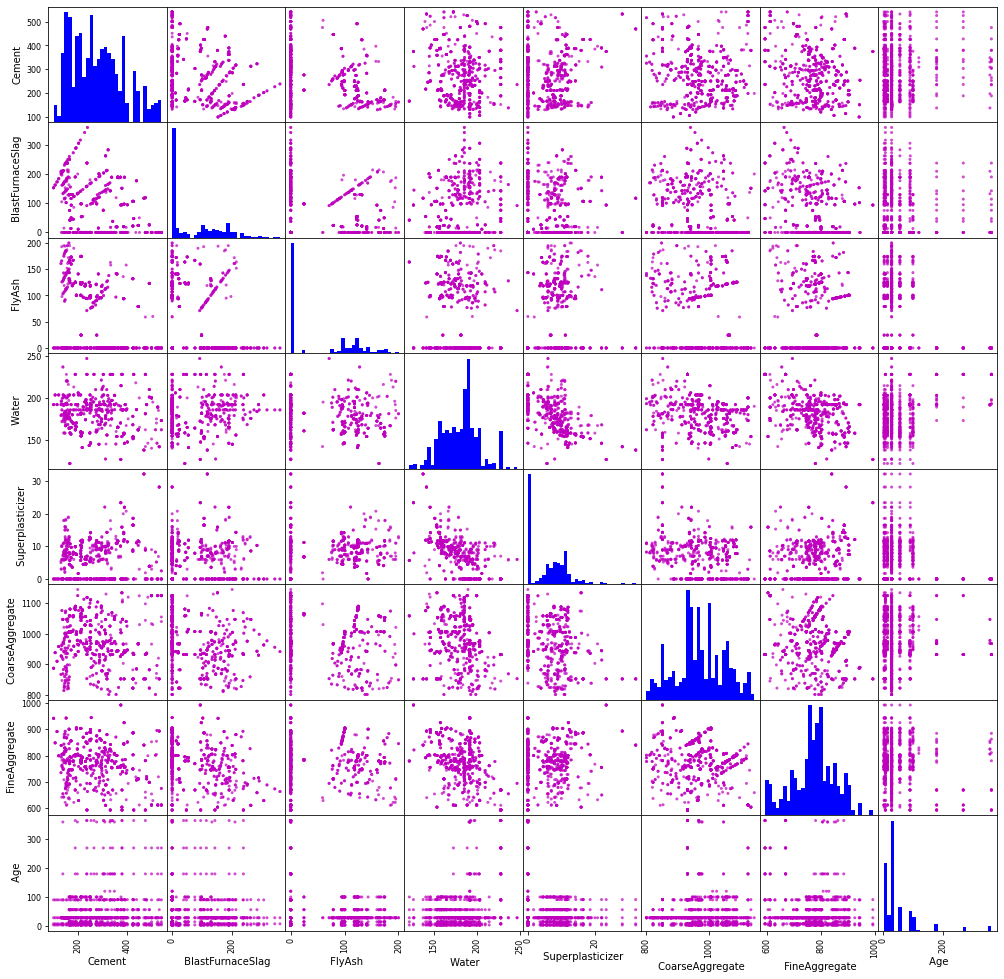

In [11]:
pd.plotting.scatter_matrix(Features, alpha=0.7, figsize=(17,17), range_padding = 0.1, diagonal='hist',
                           color = 'm', hist_kwds = {'bins':30, 'color':'blue'}) # Grafica de dispersión e histograma
plt.show()

Tabla de decisión de acuerdo al valor de la correlación:

*   $Corr = 0$ hasta $Corr = 0.3$ - Correlación despreciable (las dos características son independientes).
*   $Corr = 0.3$ hasta $Corr = 0.5$ - Baja correlación positiva.
*   $Corr = 0.5$ hasta $Corr = 0.7$ - Correlación positiva mediana.
*   $Corr = 0.7$ hasta $Corr = 0.9$ - Alta correlación positiva
*   $Corr = 0.9$ hasta $Corr = 1$ - Muy alta correlación positiva

*Nota:* Esta interpretación también se aplica para las correlaciones negativas.

## Método 3: Coeficiente de Correlación de Pearson

**Coeficiente de Correlación de Pearson:** El coeficiente de correlación de Pearson o de correlación producto-momento para una población y una muestra de datos, es una métrica que relaciona las variables basado en una correlación lineal. Por lo general, si el coeficiente es -1 entonces hay una correlación lineal negativa entre dos variables; si el coeficiente es 0 entonces no hay correlación entre dos variables; y si el coeficiente es +1 entonces hay correlación lineal positiva entre dos variables.

El coeficiente de correlación de Pearson para una muestra $r$ se expresa como:

$$r = \frac{S_{xy}}{\sqrt{S_{x}S_{y}}} = \frac{\sum_{n=1}^N (x_n - \mu_x)(y_n - \mu_y)}{\sqrt{\sum_{n=1}^N (x_n - \mu_x)^2}\cdot \sqrt{\sum_{n=1}^N (y_n - \mu_y)^2}}$$

donde $\mu_x$ y $\mu_y$ son las medias de $x$ e $y$, $S_x$ y $S_y$ son las sumas de los cuadrados de $x$ e $y$, y $S_xy$ es la suma de los cuadradados de tanto $x$ como $y$. Por lo general, $r \in \lbrack 0,1 \rbrack$, donde $r = 1$ significa que dos variables son altamente correlacionadas y $r = 0$ significa que no hay correlación entre las variables. Lo anterior es válido si la relación es lineal.

**Nota:** El valor de $r$ de Pearson puede ser engañoso si los datos tienen una relación no lineal, por lo que siempre se deben graficar los datos. En este caso, se debe visualizar que los puntos agrupados sean más estrechamente alrededor de una línea trazada a través de los datos. Para este caso, se recomienda hacer un análisis de regresión lineal simple o múltiple.

In [12]:
r = []
valor_p = []
Data_cemento = Features.values
Data_cemento = np.asarray(Data_cemento)

for _,n in enumerate(np.arange(0,Data_cemento.shape[1])):
  for _,m in enumerate(np.arange(0,Data_cemento.shape[1])):  
      r_valor, p_valor = pearsonr(Data_cemento[:,n], Data_cemento[:,m])
      r.append(r_valor)
      valor_p.append(p_valor)

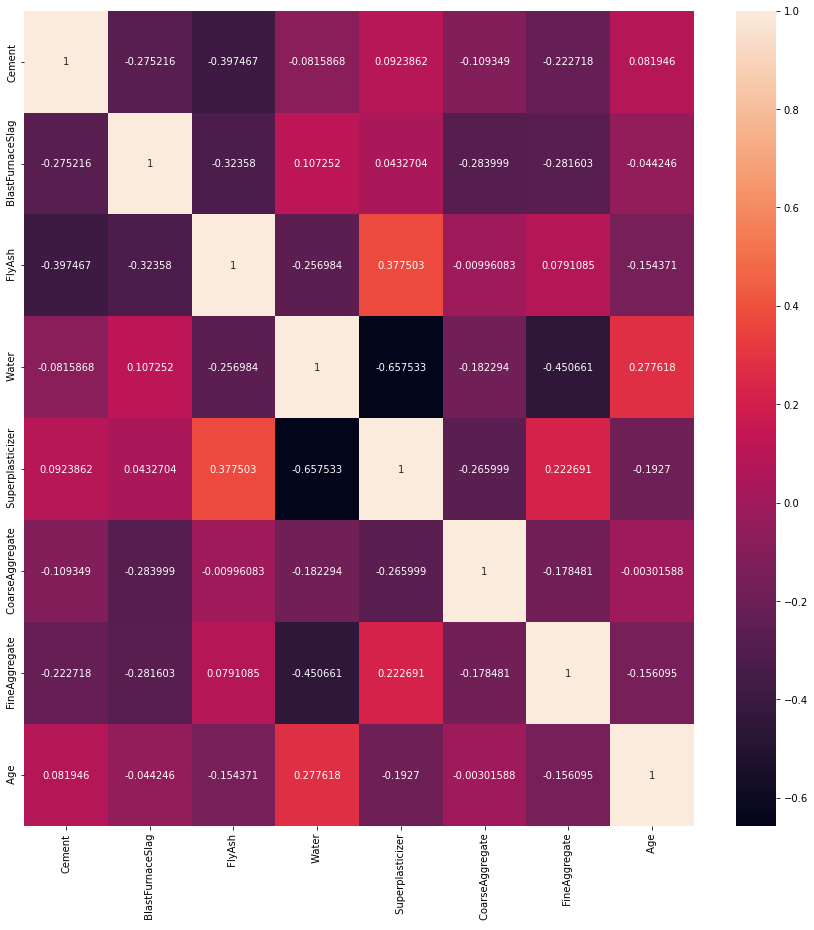

In [13]:
r = np.asarray(r)
valor_p = np.asarray(valor_p)

pearson_r = r.reshape(Data_cemento.shape[1],Data_cemento.shape[1])
p_value = valor_p.reshape(Data_cemento.shape[1],Data_cemento.shape[1])

plt.figure(figsize=(15,15))
ax = sns.heatmap(pearson_r, annot=True, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas)
plt.show()

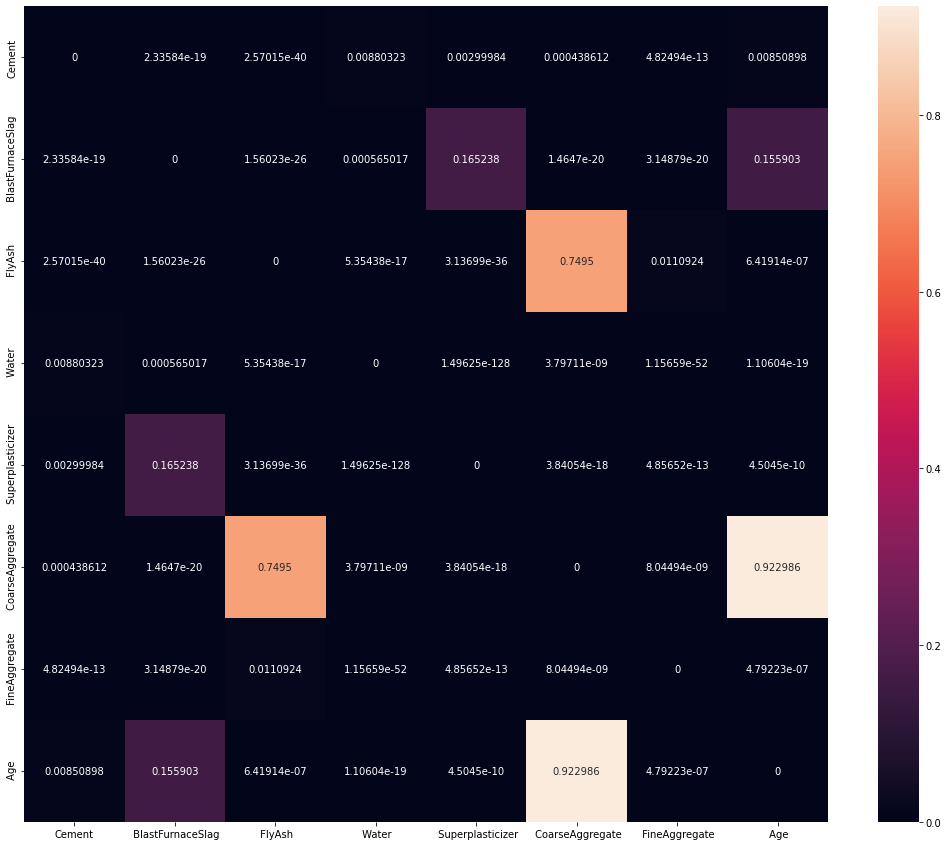

In [14]:
plt.figure(figsize=(18,15))
ax = sns.heatmap(p_value, annot=True, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas)
plt.show()

Observen que al organizar los valores del coeficiente de Pearson en una matriz entre características es exactamente igual a la matriz de correlación. No obstante, los coeficientes de Pearson nos permite obtener los valores p para analizar con mayor detalle la relación entre características. En este caso, podemos analizar dos casos:

*   Si $\rho \leq 0.05$, la correlación es estadísticamente significativo lo cual hay una relación lineal entre las dos características o variables. 
*   Si $\rho > 0.05$, la correlación no es estadísticamente significativo lo cual no hay una correlación lineal significativa entre las dos características o variables.

En el caso de la práctica con nuestra base de datos, se observa:

1. Las correlaciones entre *Age - BlastFurnaceSlag*, *Age - CoarseAggregate*, *CoarseAggregate - FlyAsh*, y *Superplasticizer - BlastFurnaceSlag* no son estadisticamente significativos.
2. Las correlaciones restantes si son estadísticamente significativos.

## Método 4: Correlación de Rango de Spearman

La **correlación de rango de Spearman** o coeficiente de correlación de Spearman se desarrollo para analizar los datos cuando hay presencia de datos atípicos o ruido (esa parte lo analizaremos en otra unidad), haciendo una medida más confiable de la prueba de hipótesis y el desempeño de los modelos de regresión. Por lo general, esta métrica calcula el rango de cada valor el cual es el índice de aparición de los valores. Por ejemplo, tenemos un vector de datos $\lbrack 1, 2, 5, 7 \rbrack$ y el valor $5$ esta ubicado en el índice $3$ y el valor $7$ esta ubicado en el índice $4$. 

Matemáticamente, la correlación de rango de Spearman se expresa como:

$$r = 1 - \frac{6\sum_{n=1}^N d_n^2}{N(N^2 - 1)}$$

donde $d_n^2$ es la diferencia entre un par de rangosy $N$ es el número de casos o rangos. $d_n^2$ por lo general se expresa como:

$$d_n^2 = (rg(X_n) - rg(Y_n))^2$$

siendo $rg(\cdot)$ el rango de valores ordenados de una variable. 

El coeficiente $r$ tiene un rango $\lbrack 0,1 \rbrack$, donde $r = 1$ representa la máxima correlación entre dos variables.

In [15]:
spearman = []
valor_p = []
Data_cemento = Features.values
Data_cemento = np.asarray(Data_cemento)

for _,n in enumerate(np.arange(0,Data_cemento.shape[1])):
  for _,m in enumerate(np.arange(0,Data_cemento.shape[1])):  
      s_valor, p_valor = spearmanr(Data_cemento[:,n], Data_cemento[:,m])
      spearman.append(s_valor)
      valor_p.append(p_valor)

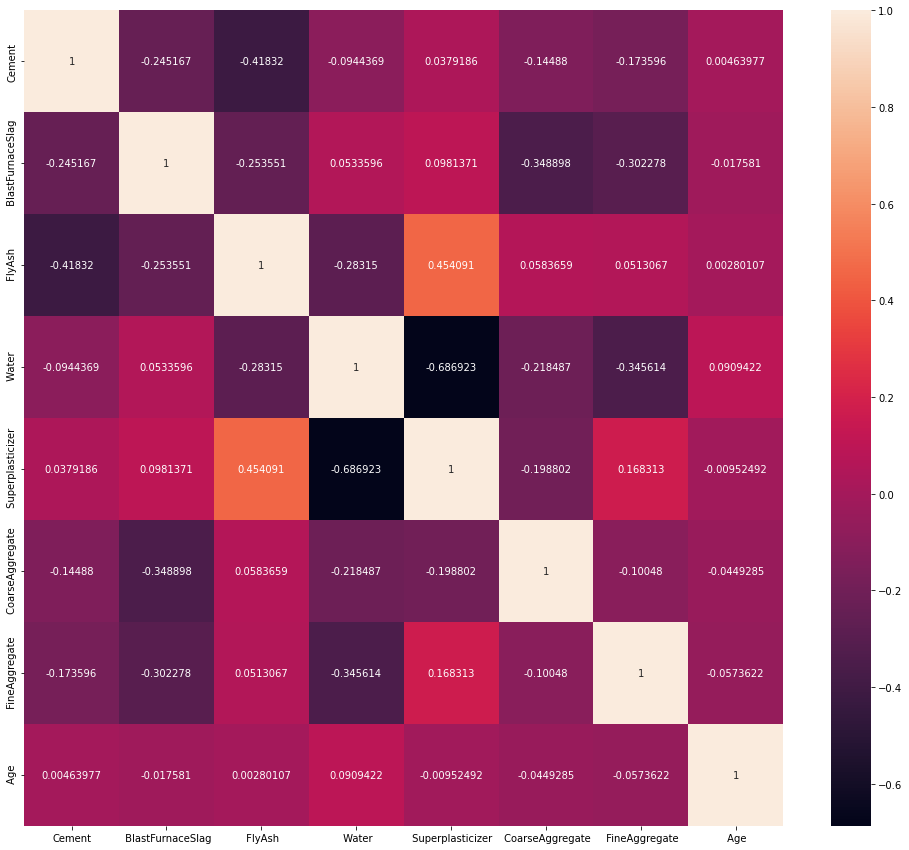

In [16]:
spearman = np.asarray(spearman)
valor_p = np.asarray(valor_p)

spearman_r = spearman.reshape(Data_cemento.shape[1],Data_cemento.shape[1])
p_value = valor_p.reshape(Data_cemento.shape[1],Data_cemento.shape[1])

plt.figure(figsize=(17,15))
ax = sns.heatmap(spearman_r, annot=True, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas)
plt.show()

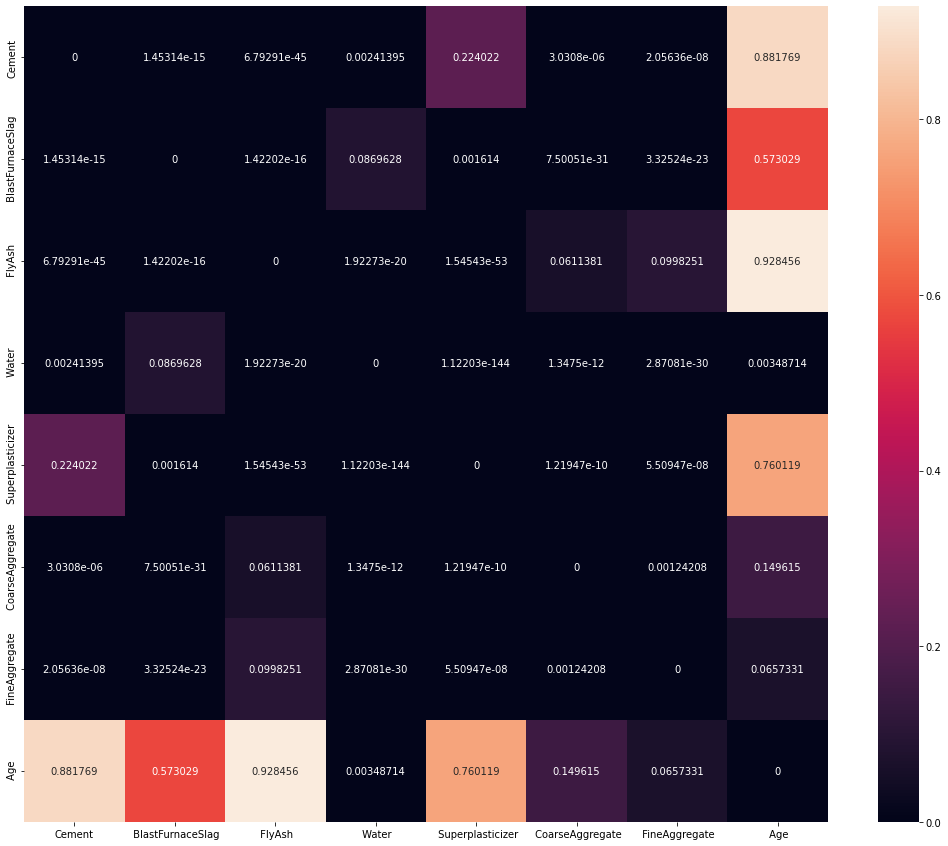

In [17]:
plt.figure(figsize=(18,15))
ax = sns.heatmap(p_value, annot=True, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas)
plt.show()

Analizando aquellas relaciones con valor $\rho > 0.05$, se encuentran las siguientes relaciones que no es estadísticamente significativos:

1.   *Age - Cement*
2.   *Age - BlastfumaceSlag*
3.   *Age - FlyAsh*
4.   *Age - Superplasticizer*
5.   *Age - CoarseAggregate*
6.   *Age - FineAggregate*
7.   *FineAggregate - FlyAsh*
8.   *CoarseAggregate - FlyAsh*
9.   *Superplasticizer - Cement*
10.  *Water - BlastfumaceSlag*   

Considerando la matriz de valores p usando la correlación de rango de Spearman, es interesante ver la diferencia de resultados con respecto a la matriz de valores p con la correlación de Pearson. Es evidente que hay más relaciones entre características o variables que sobrepasa el umbral del valor p para el caso de la correlación de rango de Spearman. 


## Método 5: Entropía

**La medida de la entropía de la información:** Por lo general, la entropía de una variable es la cantidad de información que contiene los datos en la variable, atributo o característica. En la práctica, se asume que los datos de la variable sigue una determinada distribución de densidad de probabilidad pero se asume una distribución de probabilidad uniforme (por ejemplo, la probabilidad de ganar un partido (50%) y la probabilidad de perder un partido (50%)). 


$$H(x) = - \sum_{n = 1}^N p(x_n) \log_2(p(x_n))$$

donde $x$ es el conjunto de valores de una variable o característica y $p(x_n)$ es la probabilidad de un evento que se genero en un dato $x_n$

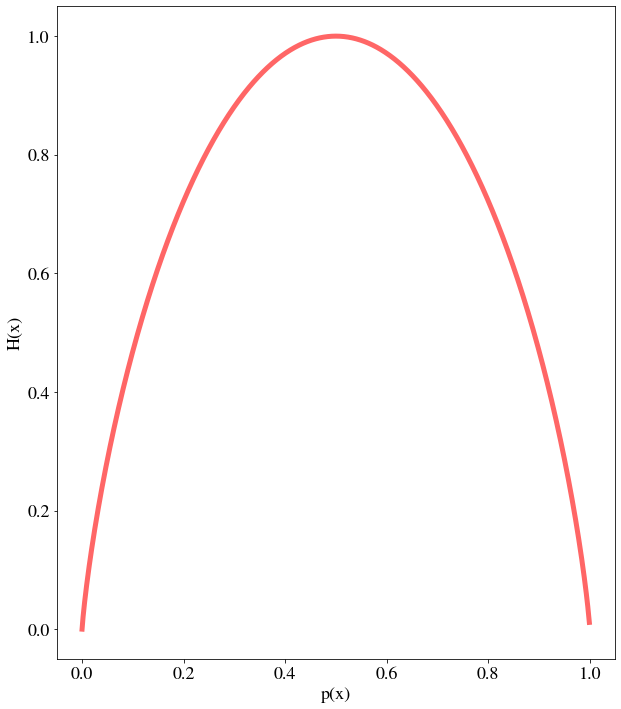

In [18]:
p_x = np.linspace(1e-15, 0.999, 1000)
p_x_complemento = abs(1 - np.linspace(1e-15, 0.999, 1000)) 
base = 2
H_prob = -(p_x*np.log(p_x))/np.log(base)
H_prob_complemento = -(p_x_complemento*np.log(p_x_complemento))/np.log(base)
H = H_prob + H_prob_complemento

#p_x = np.linspace(uniform.ppf(0), uniform.ppf(1), 1000)
#H = entr(p_x) # Calculo de la entropia

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = plt.figure(figsize=(10,12))
plt.plot(p_x, H, 'r-', lw = 5, alpha = 0.6, label = 'Entropia de Shannon')
plt.xlabel('p(x)')
plt.ylabel('H(x)') # OJO: la entropia no se muestra como la sumatoria \sum_{n=1}^N p(x)*log_2(p(x)), sino simplemente como -p(x)*log_2(p(x))
                   # Por esta razón, solo se muestra el valor de entropía por cada valor de probabilidad H(x).
                   
plt.show()

Si analizamos este grafico, hay tres puntos de importancia en el eje x de la figura. Para este caso, se considera el valor mínimo y máximo de la entropía

In [19]:
H_min = np.array([p_x[np.argmin(H)], np.min(H)])
H_max = np.array([p_x[np.argmax(H)], np.max(H)])
H_inicial = np.array([p_x[0], H[0]])

Entropia = pd.DataFrame(np.vstack([H_inicial, H_max, H_min]), index = ['p(x_inicial)', 'p(x_medio)', 'p(x_final)'], columns = ['p(x)', 'H(x)'])
display(Entropia)

,p(x),H(x)
p(x_inicial),1.000000e-15,5.127046e-14
p(x_medio),5.000000e-01,1.000000e+00
p(x_final),1.000000e-15,5.127046e-14


Las probabilidades inicial y final indican la mínima entropía de un conjunto de datos $x$. Dichas probabilidades y valores de entropía indican la mínima incertidumbre de los datos $x$. Por otra parte, la máxima entropía indica que $x$ se comporta como una distribución uniforme y por consiguiente, la incertidumbre es alta si $p = 0.5$ y $p_{complemento} = 0.5$ lo cual $H = 1$. Este sería el peor escenario de todos puesto que la incertidumbre es tan alta que no se sabe cuál suceso se pueda generar, por ejemplo, si consideramos el lanzamiento de una moneda justa, al calcular las probabilidades $p(cara) = 0.5$ y $p(sello) = 0.5$, entonces $H(x) = 1$. En este caso, no se puede decidir si la moneda es cara o sello. 

In [20]:
import numpy as np
from scipy.stats import entropy

cara_sello = [0.5, 0.5]

entropy(cara_sello, base=2)

1.0

**Entropía Relativa o divergencia de Kullback–Leibler (KL):** Es una métrica de entropía que permite medir si una distribución de densidad de probabilidad es diferente o no con respecto a otra distribución de densidad de probabilidad. Usualmente, la entropía relativa considera la otra densidad de probabilidad como la distribución de referencia para la medición.

$$KL(p \vert \vert q) = - \sum_{n=1}^N p(x_n) \log \left( \frac{p(x_n)}{q(x_n)} \right)$$

donde $q(x_n)$ es la función de densidad de probabilidad de referencia.

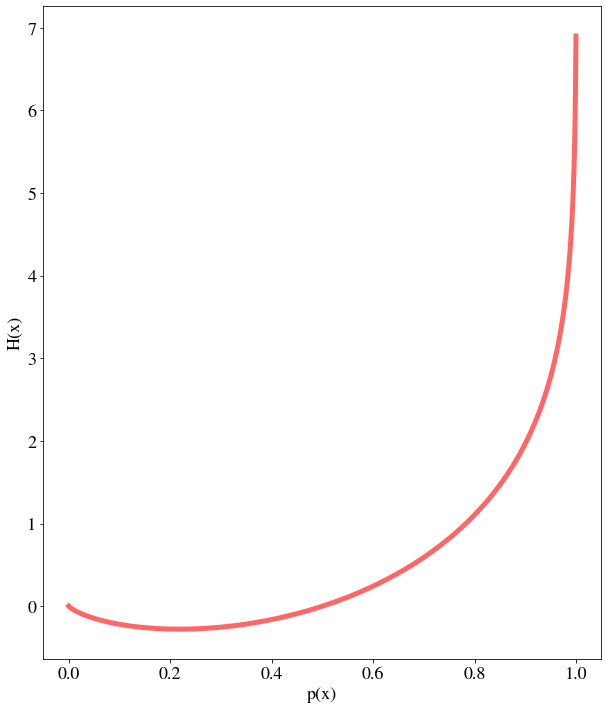

In [21]:
H_KL_1 = special.rel_entr(p_x, p_x_complemento)
H_KL_2 = special.rel_entr(p_x_complemento, p_x)

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = plt.figure(figsize=(10,12))
plt.plot(p_x, H_KL_1, 'r-', lw = 5, alpha = 0.6, label = 'Entropia KL')
plt.xlabel('p(x)')
plt.ylabel('H(x)')                    
plt.show()

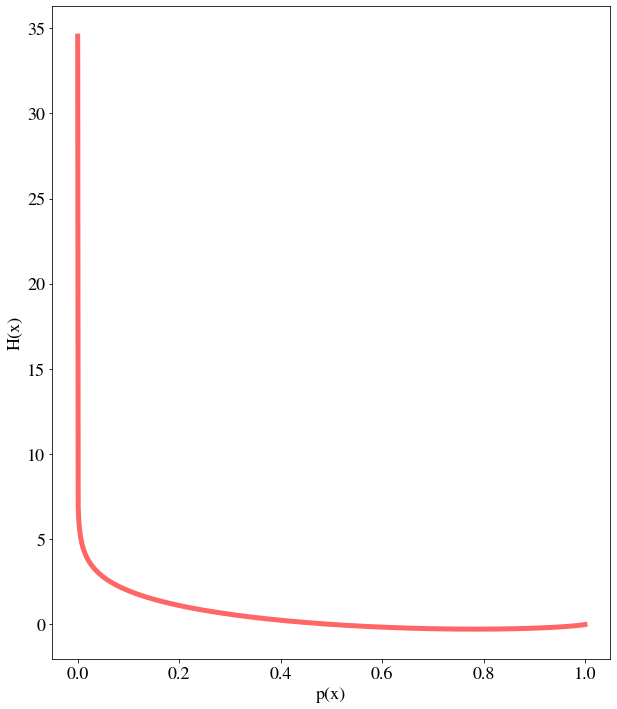

In [22]:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = plt.figure(figsize=(10,12))
plt.plot(p_x, H_KL_2, 'r-', lw = 5, alpha = 0.6, label = 'Entropia KL')
plt.xlabel('p(x)')
plt.ylabel('H(x)')                    
plt.show()

**Es importante considerar que la matriz de entropía relativa es asimétrica, es decir, $KL(p \vert \vert q) \neq  KL(q \vert \vert p)$**

¿Cómo se podría utilizar la entropía relativa con variables o características continuas?

*Clave*: **Estimadores de entropía no paramétricos**

Los Estimadores de entropía no paramétricos permiten medir la cantidad de información para variables continuas (datos cuantitativos) y discretas (binaria o con dos categorias, por ejemplo 'A' y 'B'). En Python, se utiliza una librería especializada llamada **NPEET**, el cual utilizaremos la siguiente function de entropia relativa para variables continuas (https://github.com/gregversteeg/NPEET/blob/master/npeet/entropy_estimators.py):

In [23]:
from sklearn.neighbors import BallTree, KDTree

def query_neighbors(tree, x, k):
    return tree.query(x, k=k + 1)[0][:, k]

def build_tree(points):
    if points.shape[1] >= 20:
        return BallTree(points, metric="chebyshev")
    return KDTree(points, metric="chebyshev")

def kldiv(x, xp, k=3, base=2):
    """KL Divergence between p and q for x~p(x), xp~q(x)
    x, xp should be a list of vectors, e.g. x = [[1.3], [3.7], [5.1], [2.4]]
    if x is a one-dimensional scalar and we have four samples
    """
    assert k < min(len(x), len(xp)), "Set k smaller than num. samples - 1"
    #assert len(x[0]) == len(xp[0]), "Two distributions must have same dim."
    x, xp = np.asarray(x), np.asarray(xp)
    x, xp = x.reshape(x.shape[0], -1), xp.reshape(xp.shape[0], -1)
    d = len(x[0])
    n = len(x)
    m = len(xp)
    const = np.log(m) - np.log(n - 1)
    tree = build_tree(x)
    treep = build_tree(xp)
    nn = query_neighbors(tree, x, k)
    nnp = query_neighbors(treep, x, k - 1)
    # Ajuste propuesto por el Profesor Javier F. Botía
    pos_a, pos_b = np.where(nn == 0), np.where(nnp == 0)
    nn[pos_a] = 1e-10
    nnp[pos_b] = 1e-10
    return (const + d * (np.log(nnp).mean() - np.log(nn).mean())) / np.log(base)

Aplicando esta aproximación con la base de datos:

In [24]:
from sklearn.preprocessing import MinMaxScaler

MM = MinMaxScaler()
data_cemento_MinMax = MM.fit_transform(Features)
data_cemento_MinMax = pd.DataFrame(data_cemento_MinMax, columns = Features.columns)
datos_cemento = data_cemento_MinMax.replace(0, 1e-3)
Data_cemento = datos_cemento.values
Data_cemento = np.asarray(Data_cemento)

In [25]:
hkl_cuantitativo = []
Caracteristicas = Features.columns

for _,n in enumerate(np.arange(0,Data_cemento.shape[1])):
  for _,m in enumerate(np.arange(0,Data_cemento.shape[1])):  
      HKL_cont = kldiv(list(Data_cemento[:,n]), list(Data_cemento[:,m]), k = 3, base=2)
      hkl_cuantitativo.append(HKL_cont)

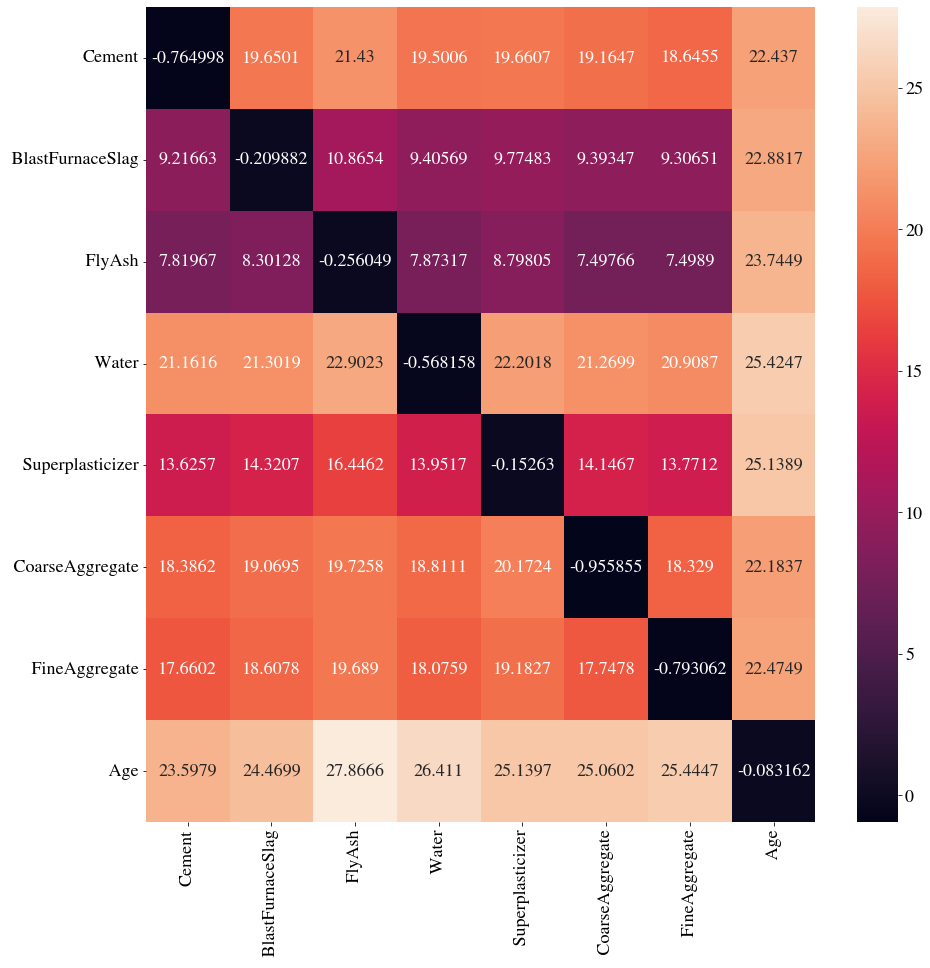

In [26]:
HKL_cont = np.asarray(hkl_cuantitativo)
HKL_cont_matriz = HKL_cont.reshape(Data_cemento.shape[1],Data_cemento.shape[1])

plt.figure(figsize=(15,15))
ax = sns.heatmap(HKL_cont_matriz, annot=True, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas)
plt.show()

Para analizar la anterior matrix, la diagonal de la matriz le muestra la entropía relativa continua entre las mismas características o variable, el cual es un valor negativo debido a la aproximación usada. Esta diagonal no es relevante para el análisis puesto que nos interesa las entropías relativas entre variables cuantitativas. Considerando lo anterior, entre más alto sea la entropía relativa, la correlación entre las dos características van a ser menos relevantes para el análisis. Sin embargo, si el valor de la entropía relativa es más baja o cercana a 0, entonces la correlación entre las dos características va a ser relevante para el análisis. Para tomar una decisión de cuáles correlaciones son menos relevantes para nuestro análisis, se utilizará un umbral de *25* para establecer que aquellos valores de entropía relativa por encima del umbral van a generar una divergencia.

In [27]:
pos_H_seleccionados = np.where(HKL_cont_matriz >= 25)
Lista = [Caracteristicas[pos_H_seleccionados[0]], Caracteristicas[pos_H_seleccionados[1]]]
Lista = pd.DataFrame(np.asarray(Lista).T, columns = ['Característica p', 'Característica q'])
display(Lista)

,Característica p,Característica q
0,Water,Age
1,Superplasticizer,Age
2,Age,FlyAsh
3,Age,Water
4,Age,Superplasticizer
5,Age,CoarseAggregate
6,Age,FineAggregate
